In [1]:
import numpy as np #linear algebra
import pandas as pd  #manipulations with dataframe
import datetime as dt #handling date time operations

#Visualization libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

# Feature engineyering
from scipy.stats import pearsonr, ttest_ind
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, chi2

# importing the VIF libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [2]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [3]:
#importing files
file_name = 'train.csv'
file_location = 'D://Kaggle//House price prediction//house-prices-advanced-regression-techniques//'
df = pd.read_csv(file_location+file_name)

file_name = 'test.csv'
test = pd.read_csv(file_location+file_name)
df.head()
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
# so we have SalePrice price column in the df on which we will train our model

In [8]:
# checking the null values

df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
df.isnull().sum().sum()

6965

In [10]:
# so we have 6965 total null values in the data.

In [11]:
df_cat = df.select_dtypes(include= ['object'])
df_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [12]:
# we have 43 categorical columns

In [13]:
# univariate analysis
# plotting graphs
plt.style.use('ggplot')

In [14]:
df_num = df.select_dtypes(include= ['number'])
df_num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


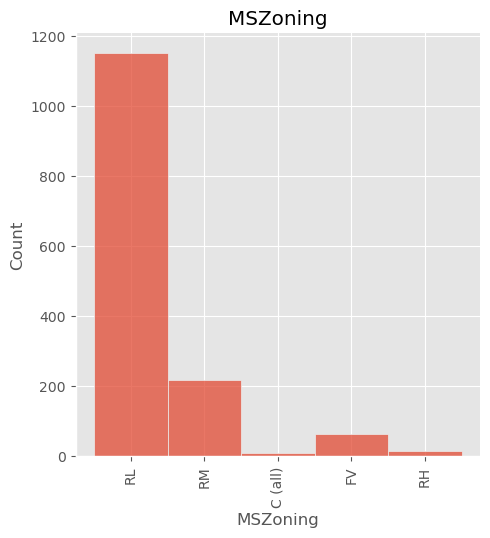

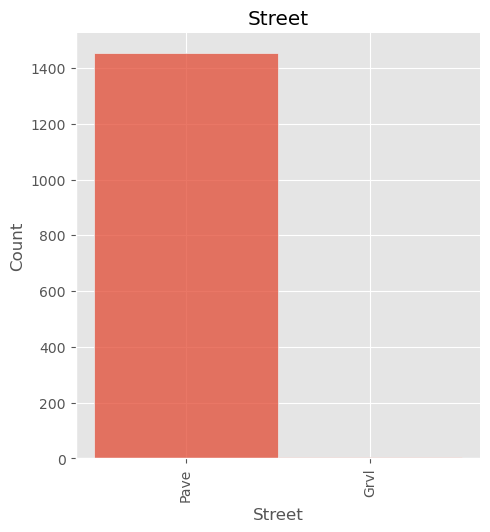

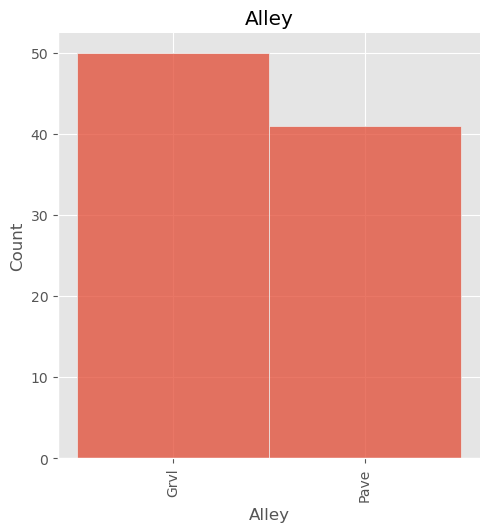

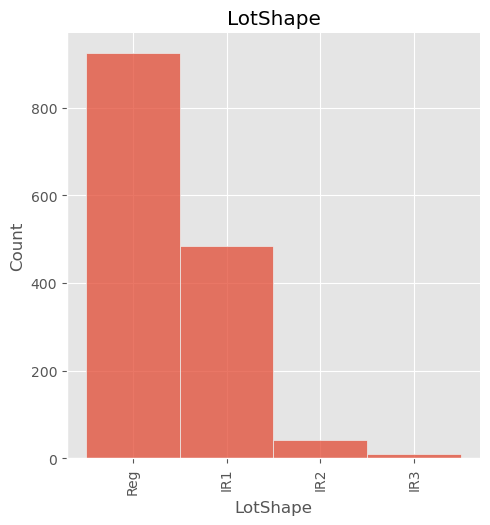

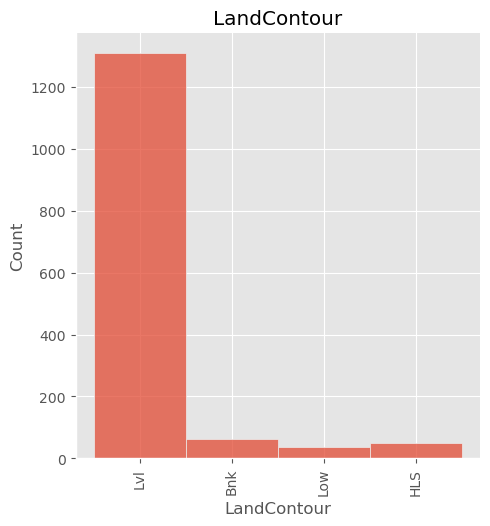

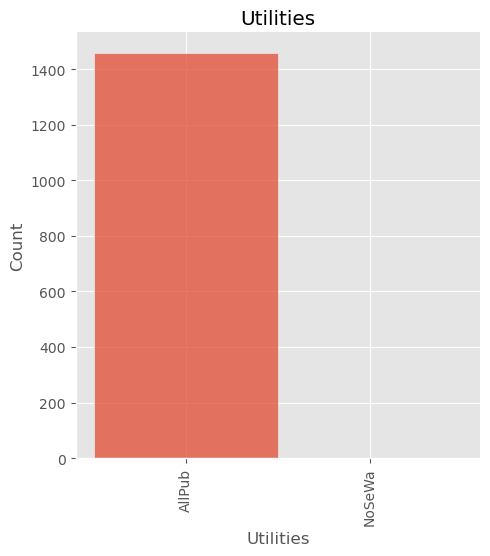

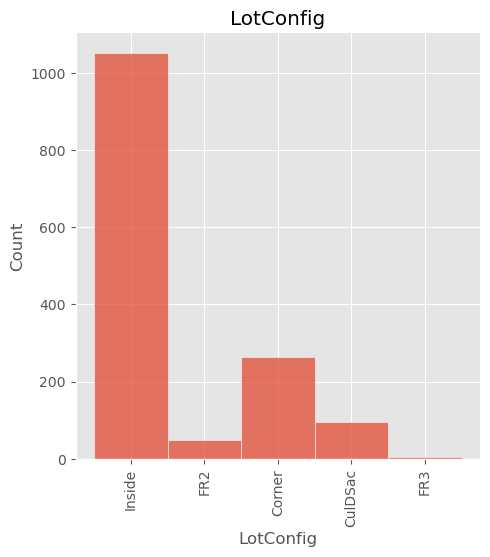

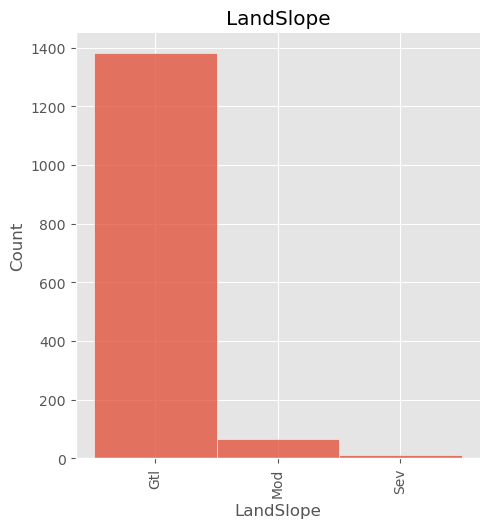

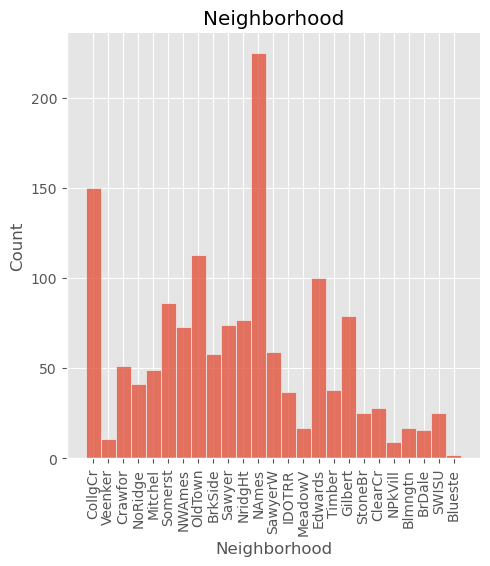

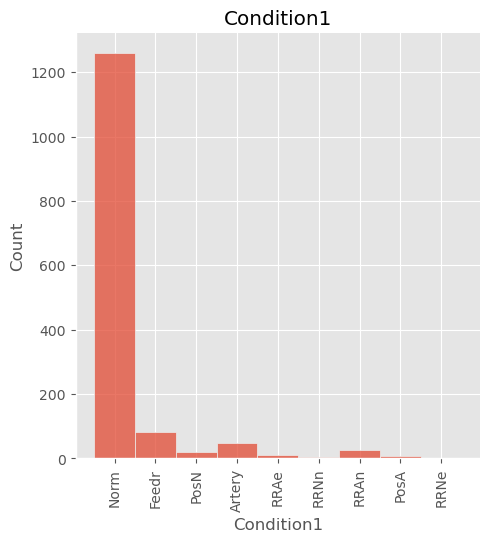

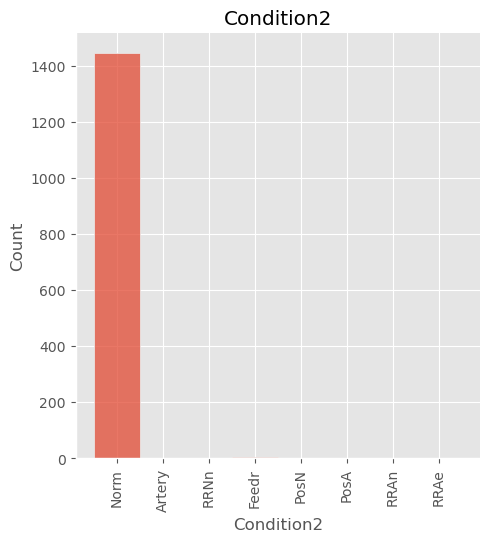

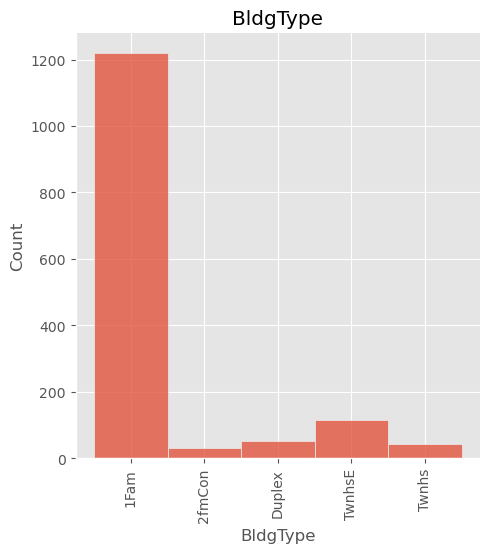

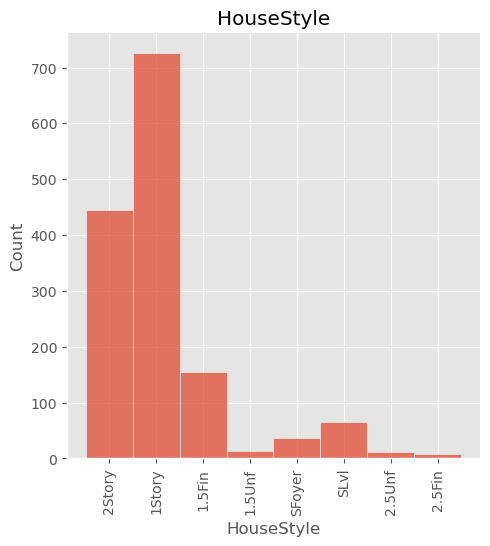

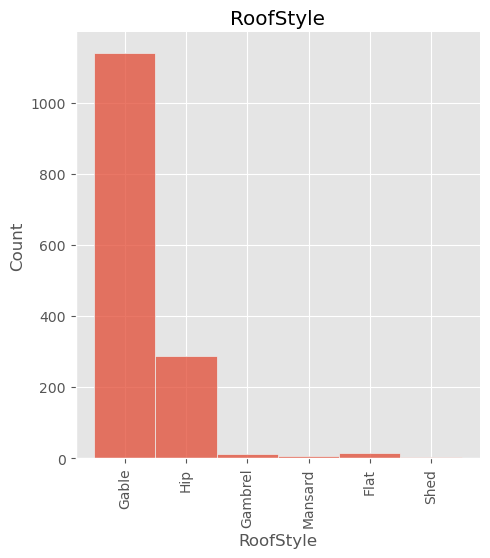

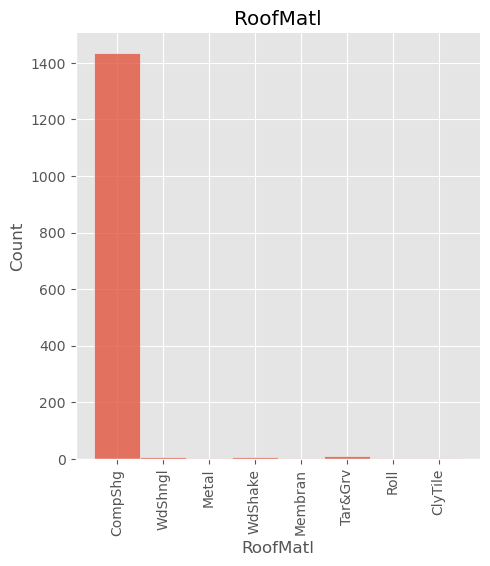

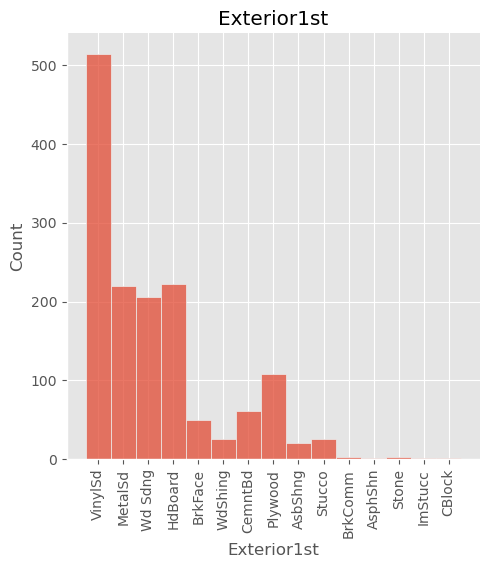

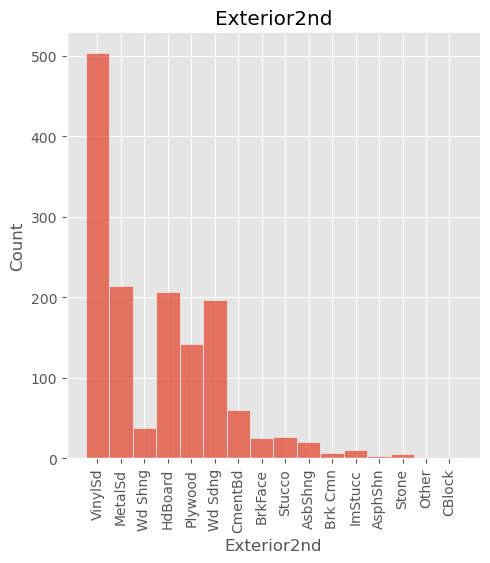

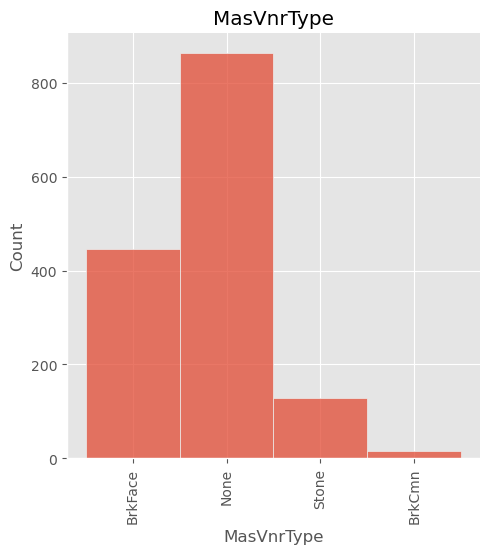

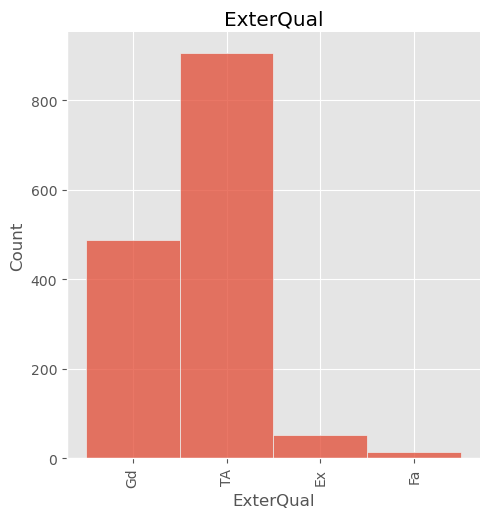

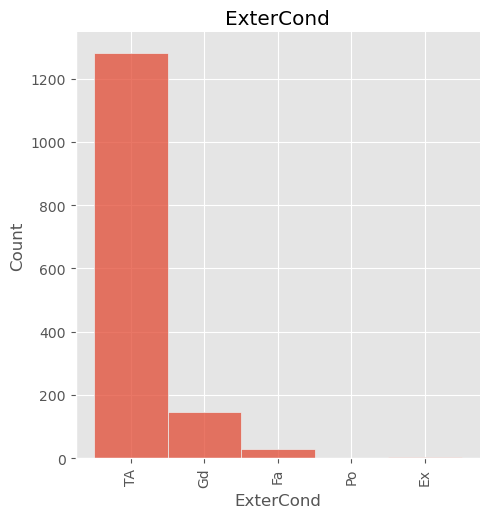

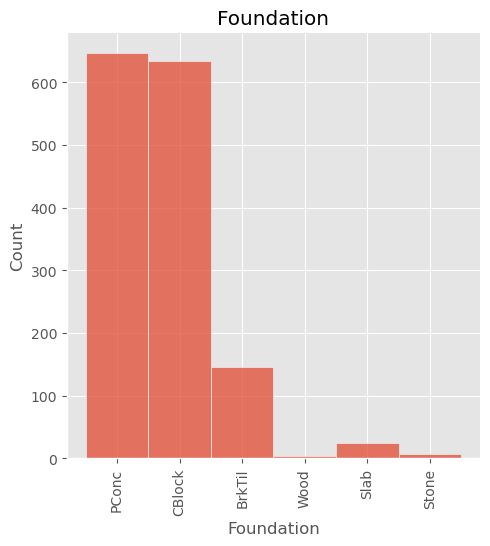

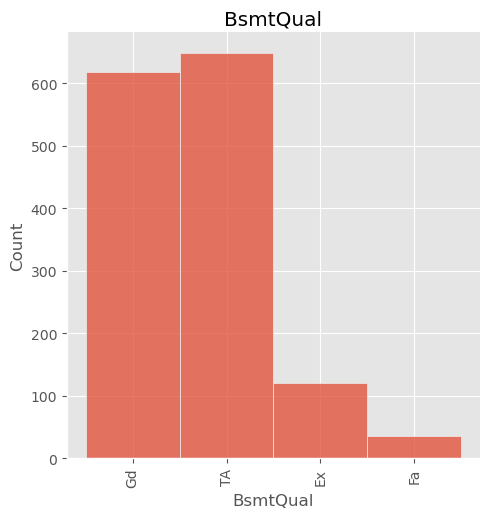

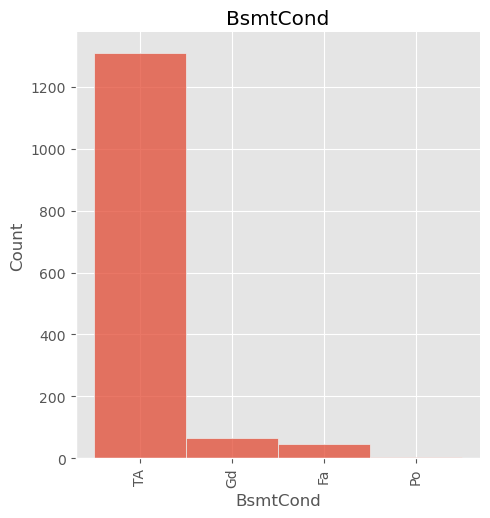

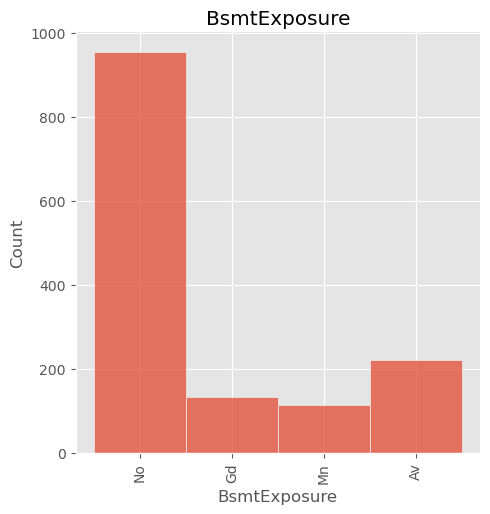

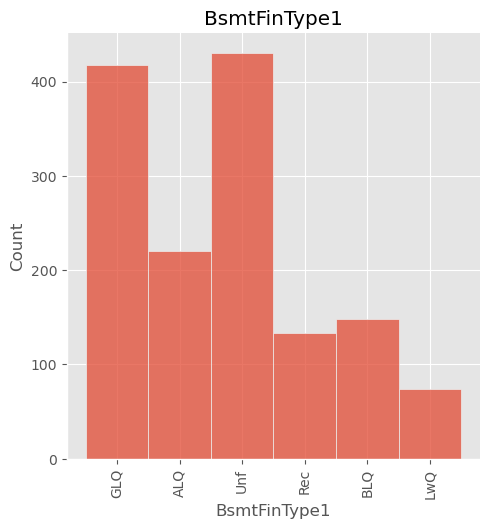

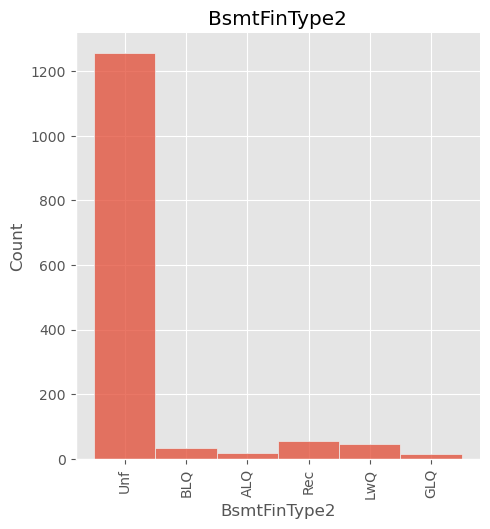

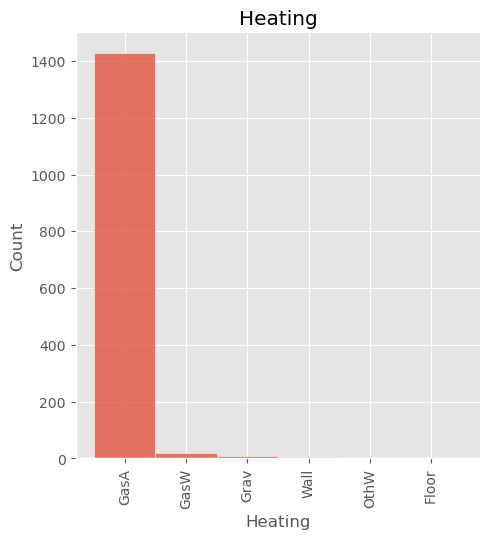

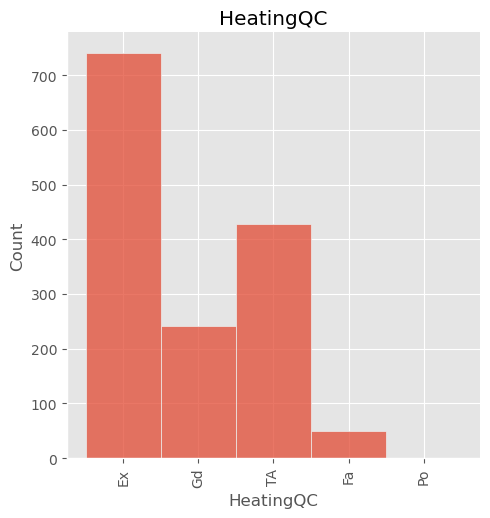

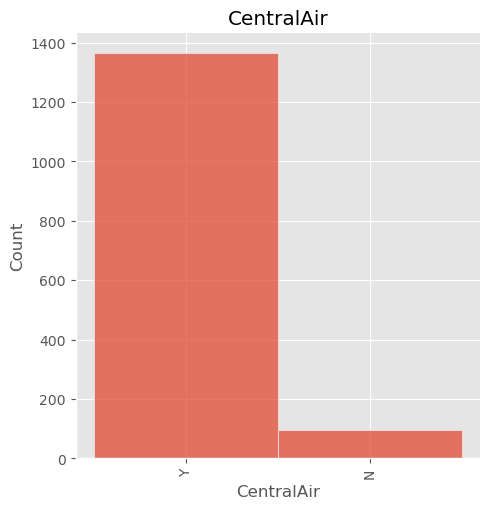

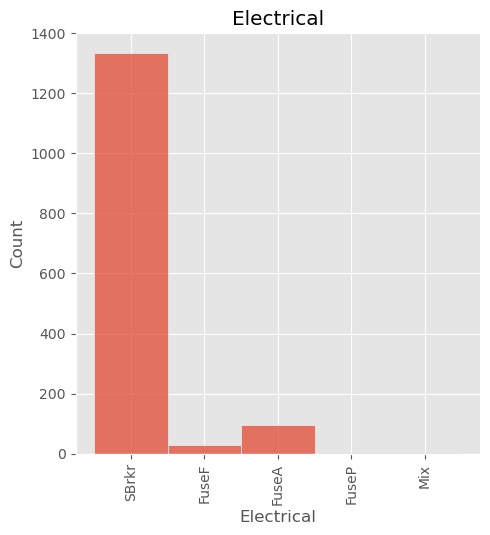

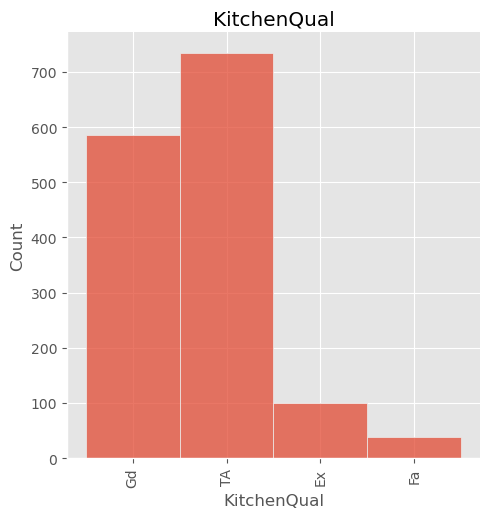

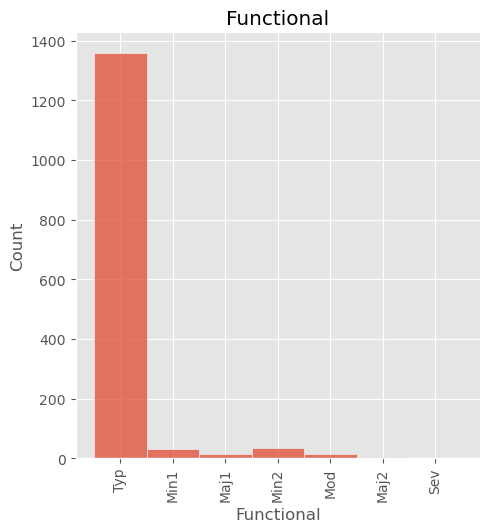

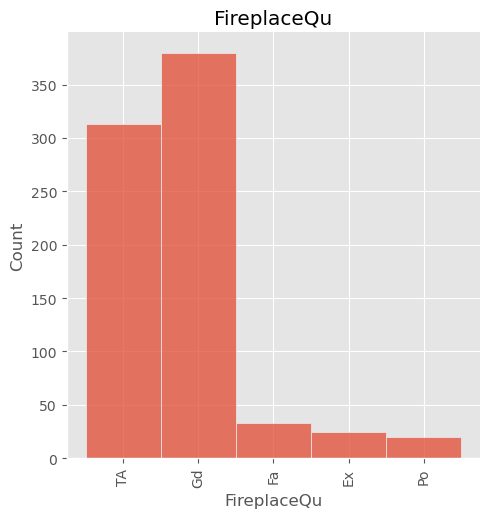

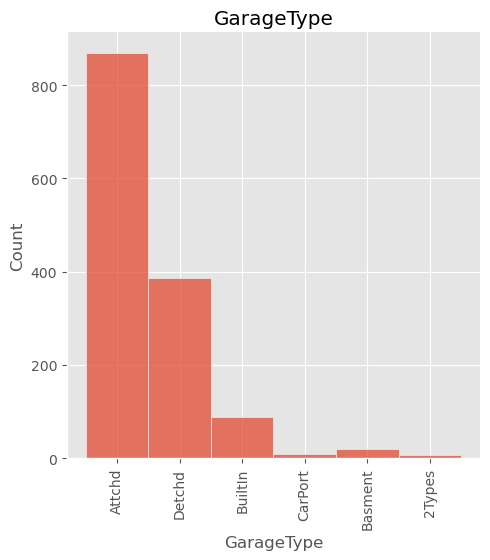

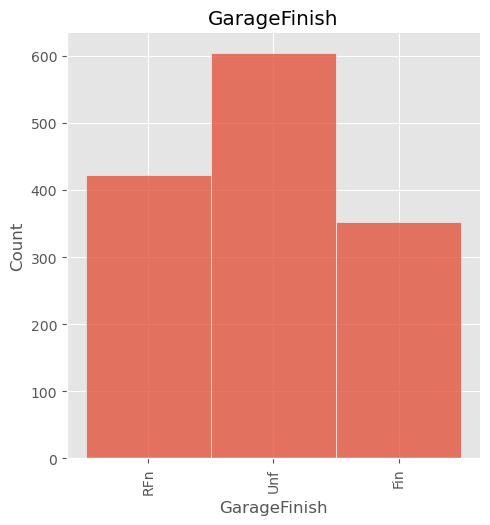

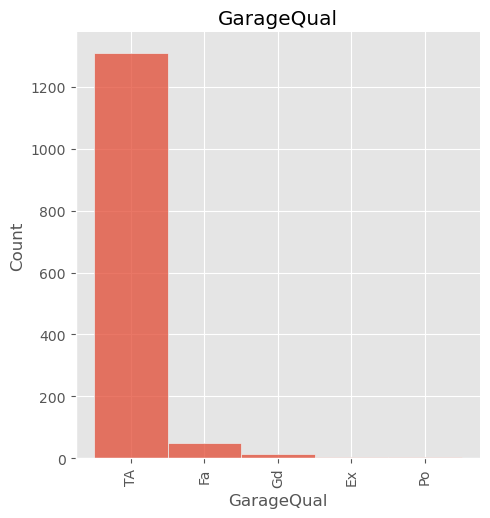

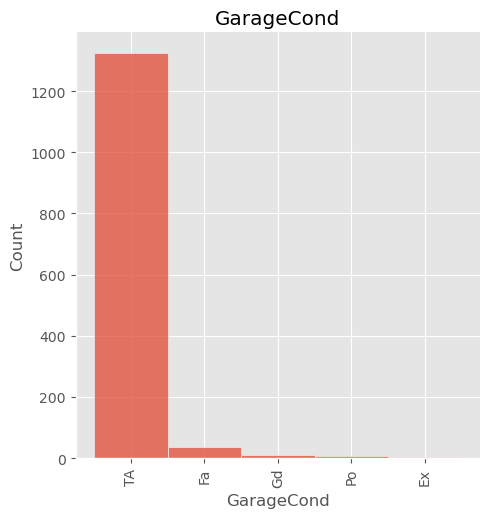

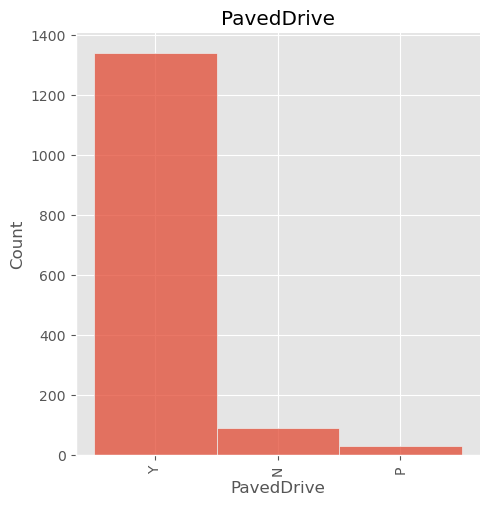

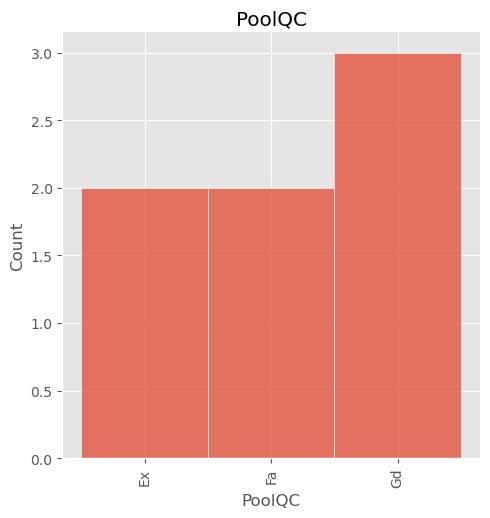

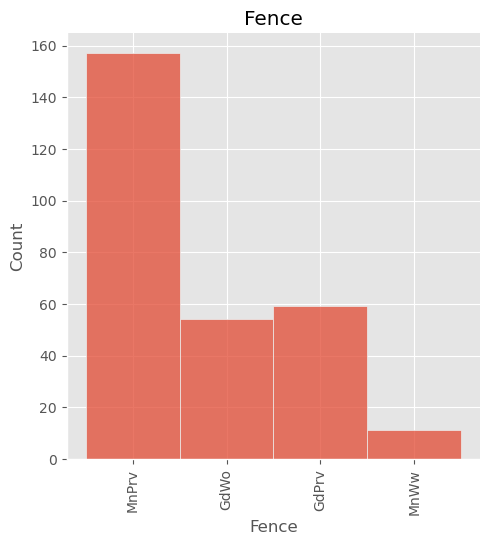

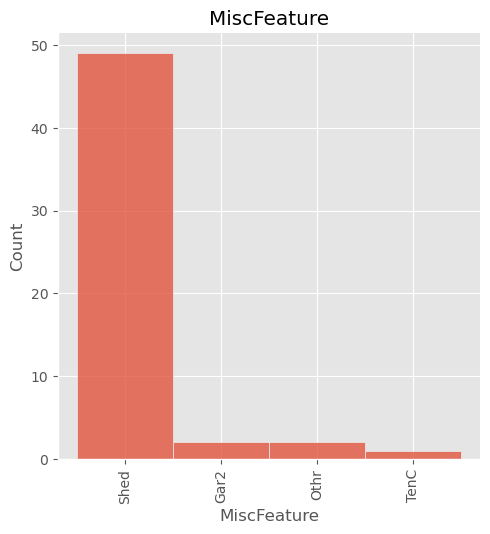

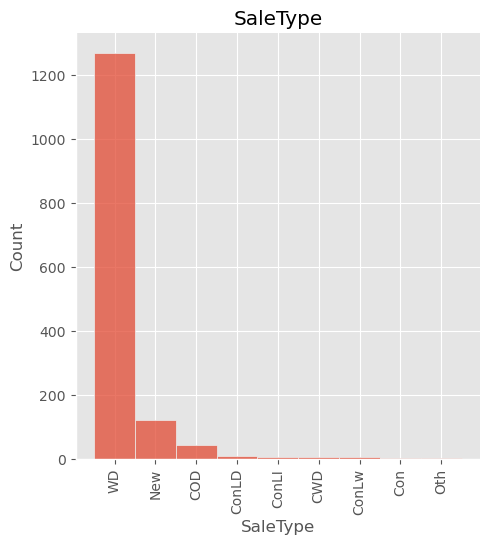

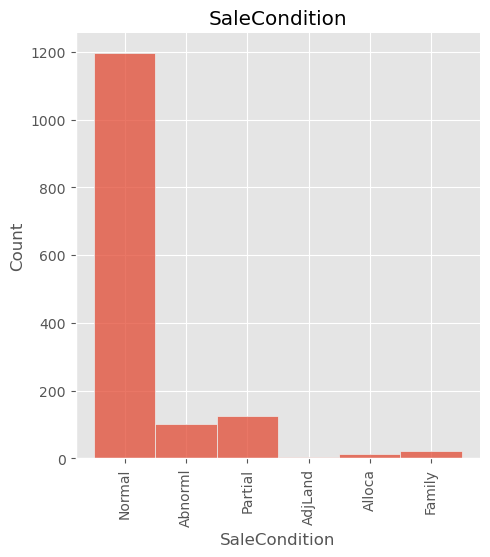

In [15]:
for i in df_cat.columns:
    sns.displot(df_cat[i])
    plt.title(i)
    plt.xticks(rotation=90)  # Corrected parameter name
    plt.show() 

In [16]:
df_cat.columns = df_cat.columns.str.replace(' ','')

In [17]:
# the columns that only have one value as per graph
col = ['Utilities', 'Condition2', 'BldgType', 'RoofMatl', 'Heating']

In [18]:
# checking different values in these columns
for i in col:
    print(i,'\n' ,df_cat[i].value_counts())

Utilities 
 AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Condition2 
 Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64
BldgType 
 1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
RoofMatl 
 CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64
Heating 
 GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64


In [19]:
df_cat.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [21]:
df_cat.shape

(1460, 43)

In [22]:
# since the null values are significant we cannot delete them.
# we will replace them with the mode of the columns
for i in df_cat.columns:
    df_cat[i] = df_cat[i].fillna(df_cat[i].mode()[0])

In [23]:
df_cat.isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [24]:
# we have taken care of the nulls in df_cat

C:\Users\pauld\anaconda3\Lib\site-packages\seaborn\axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


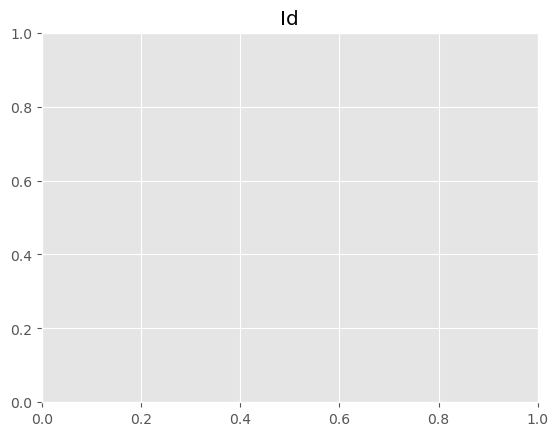

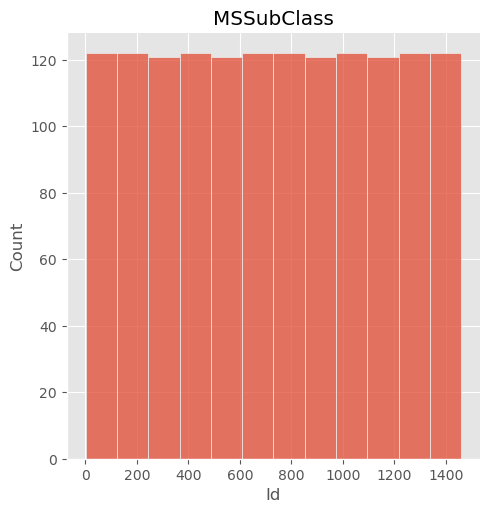

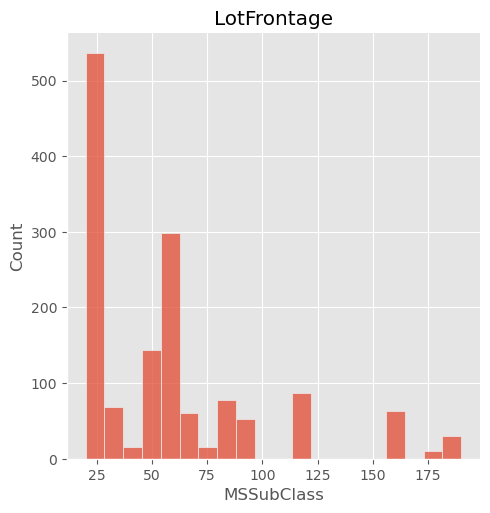

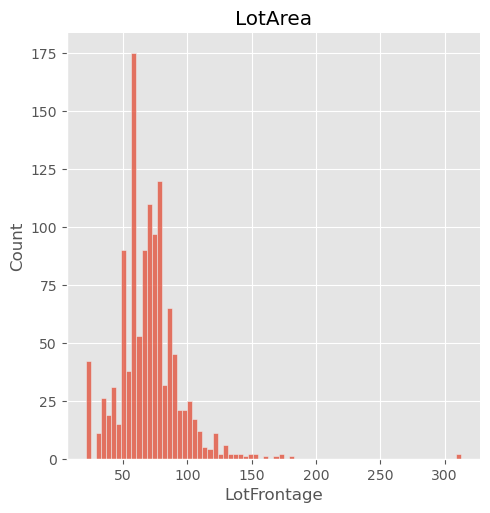

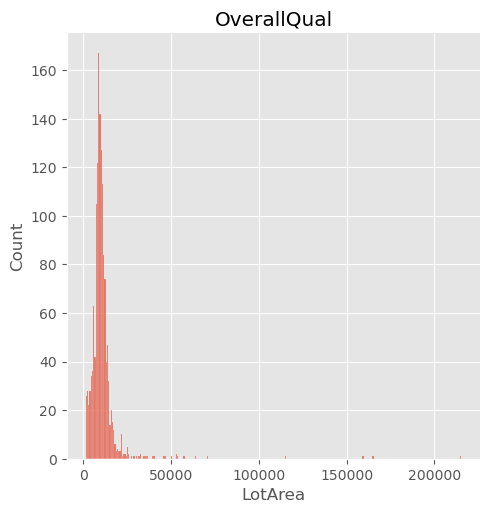

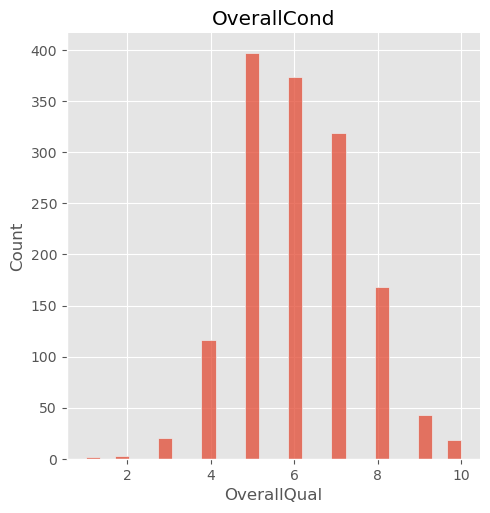

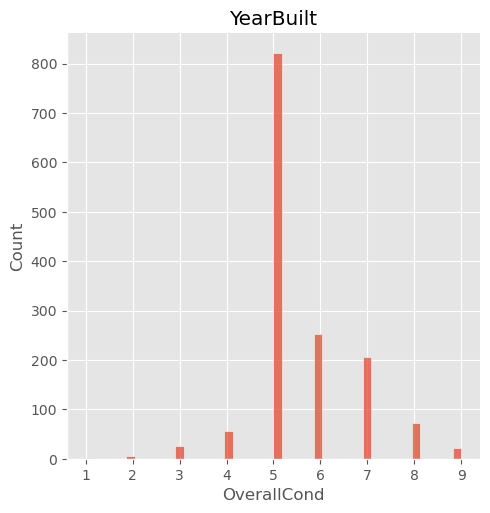

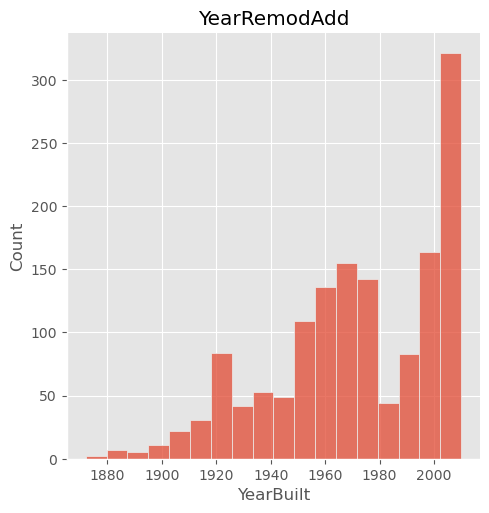

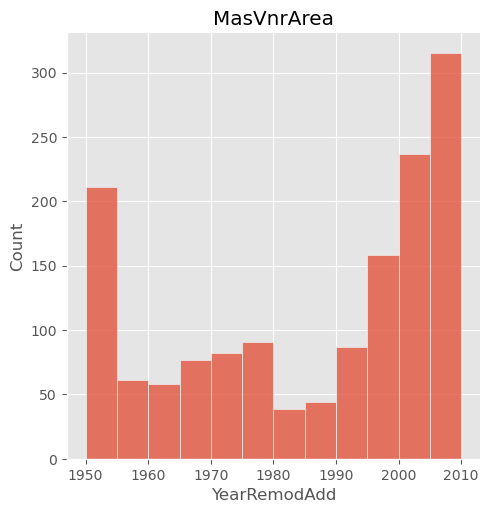

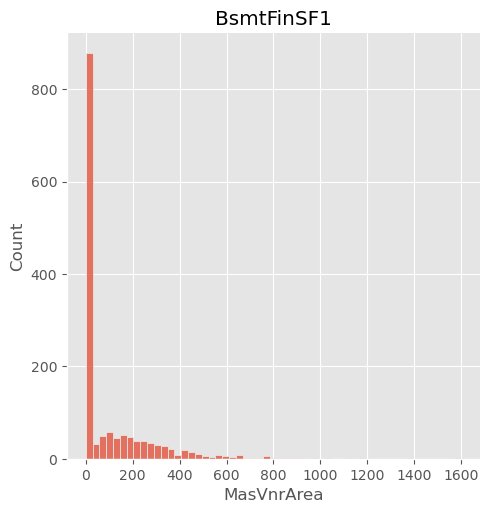

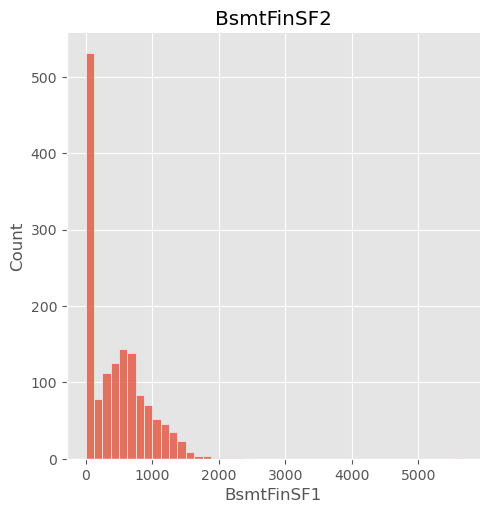

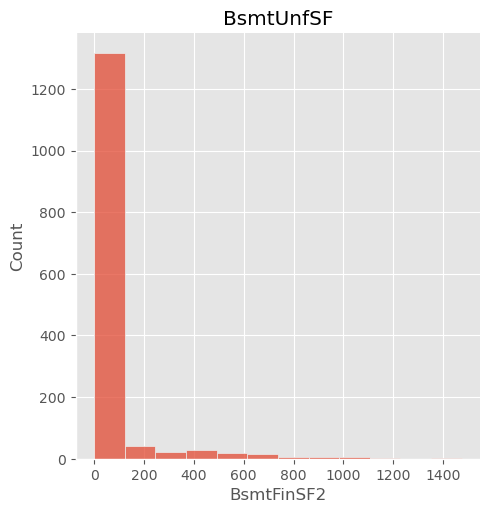

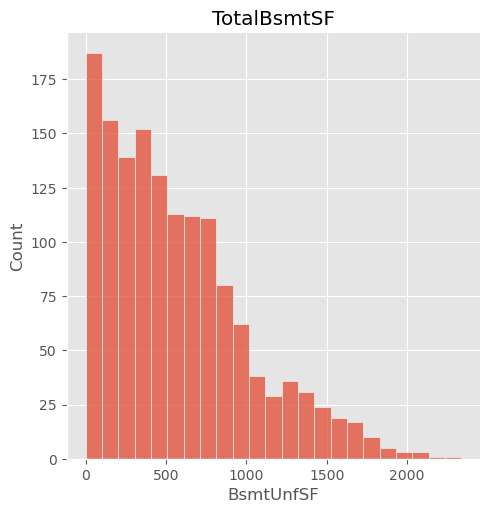

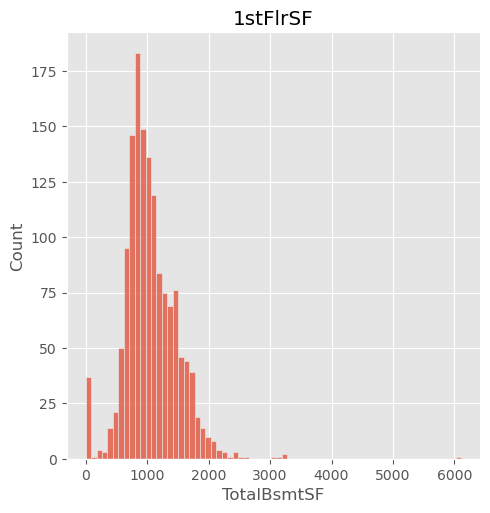

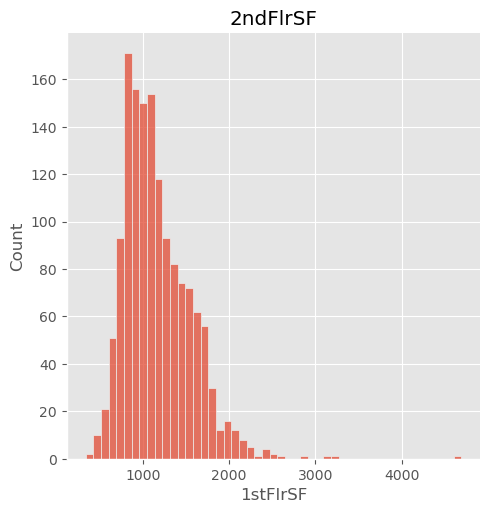

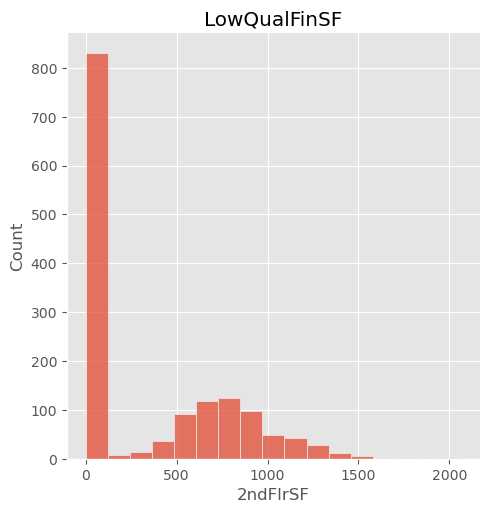

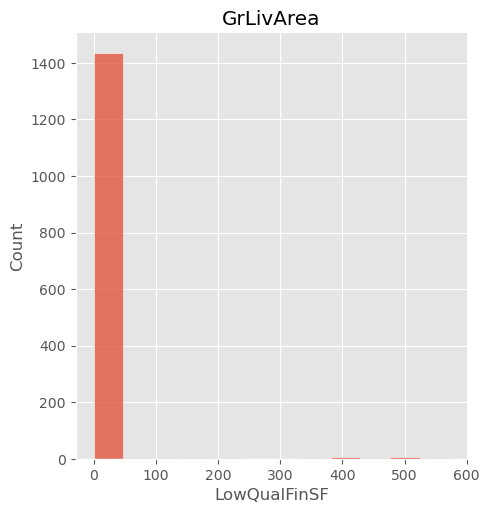

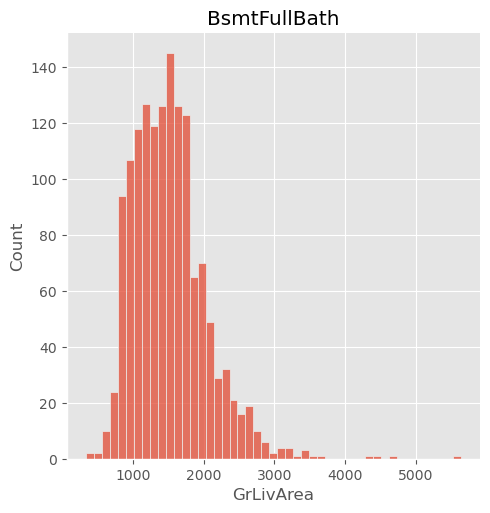

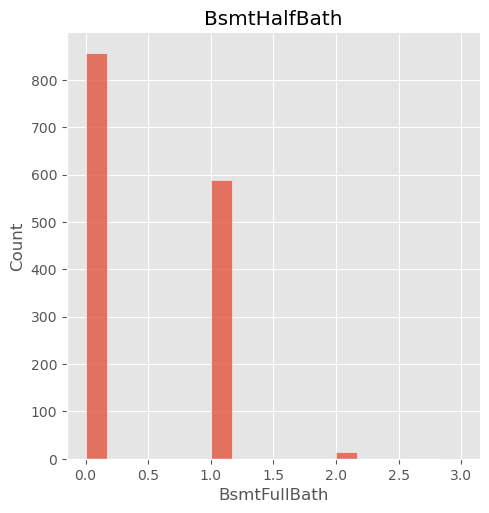

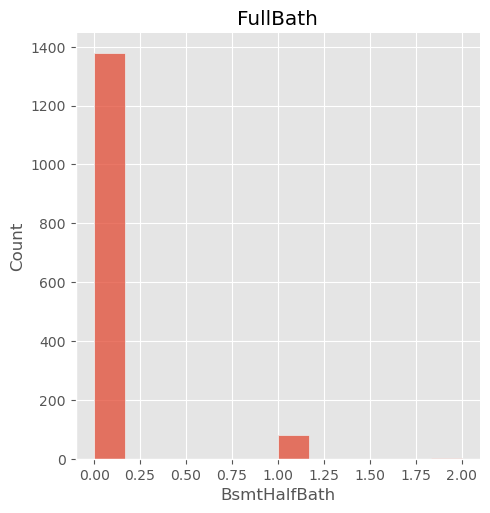

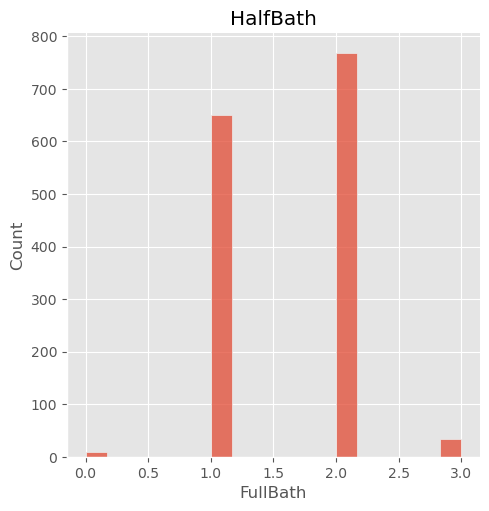

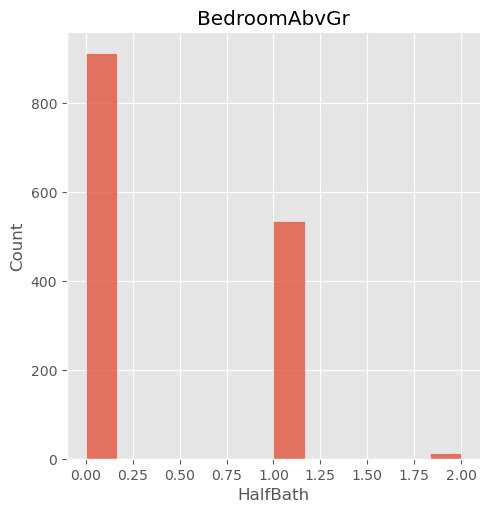

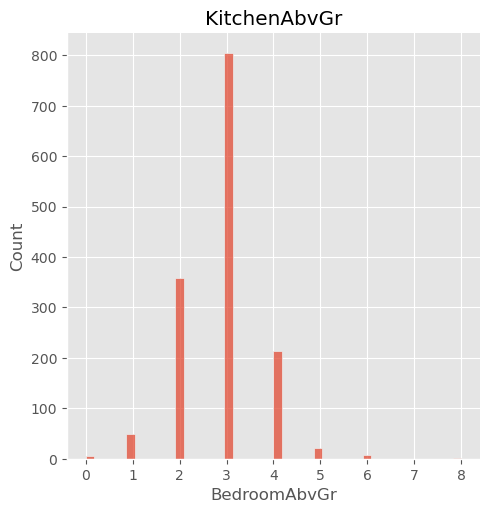

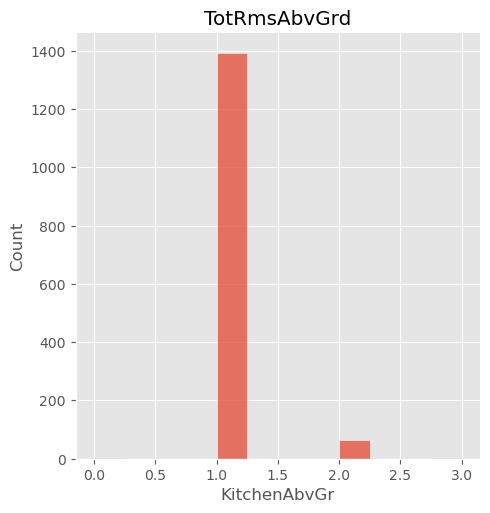

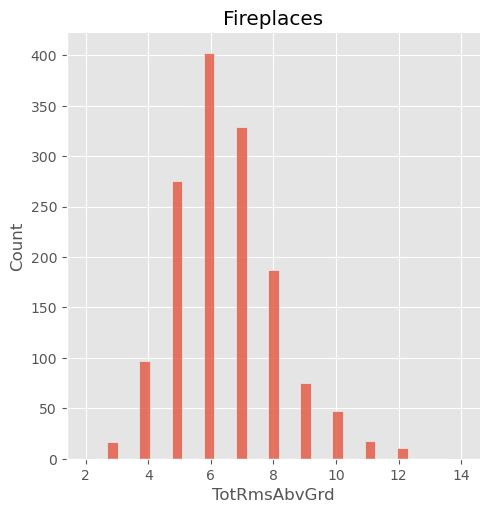

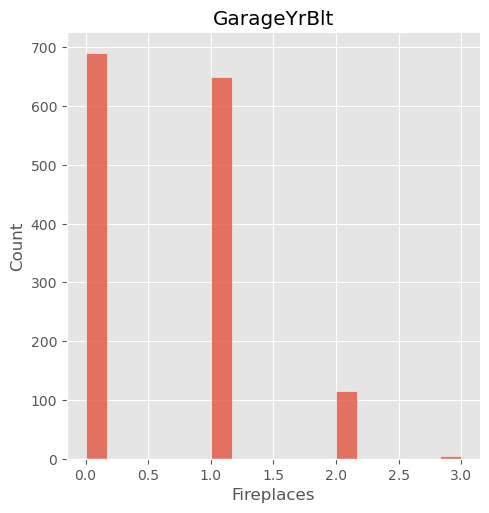

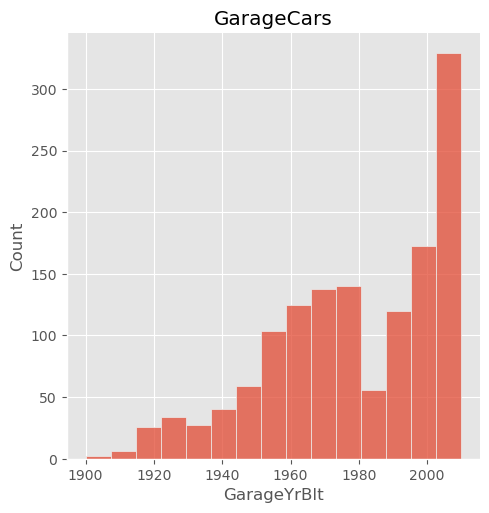

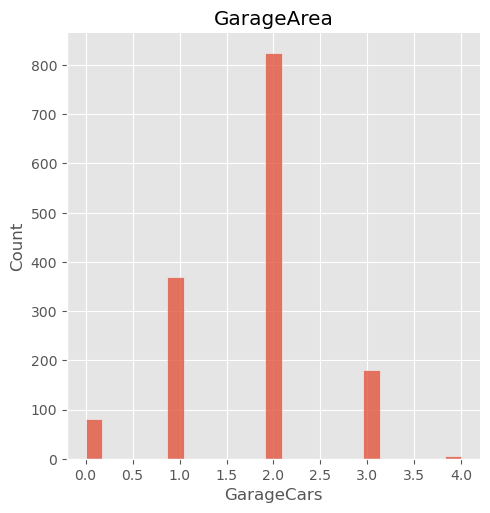

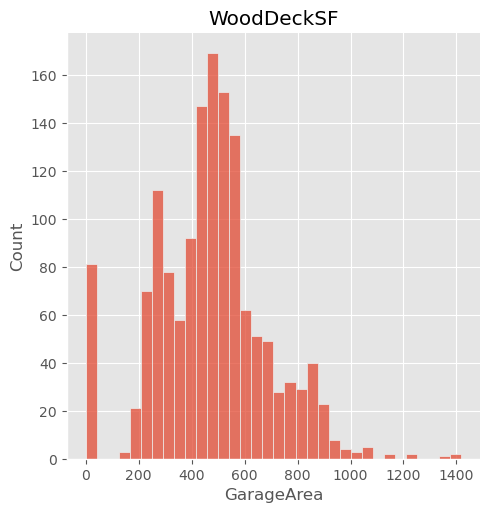

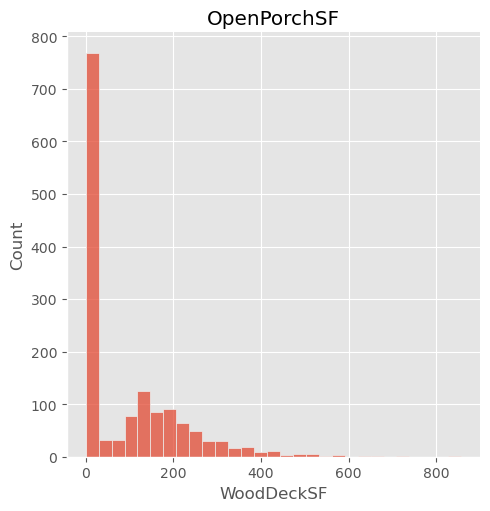

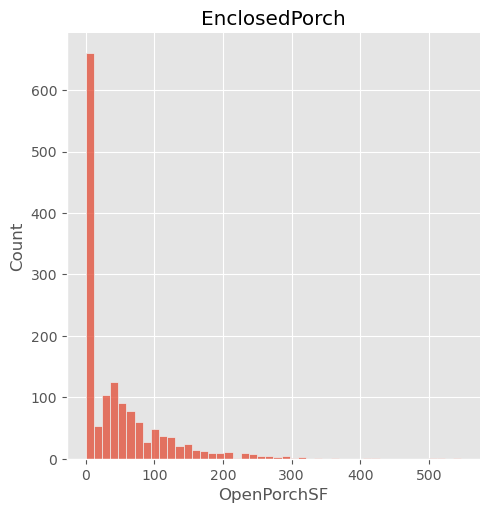

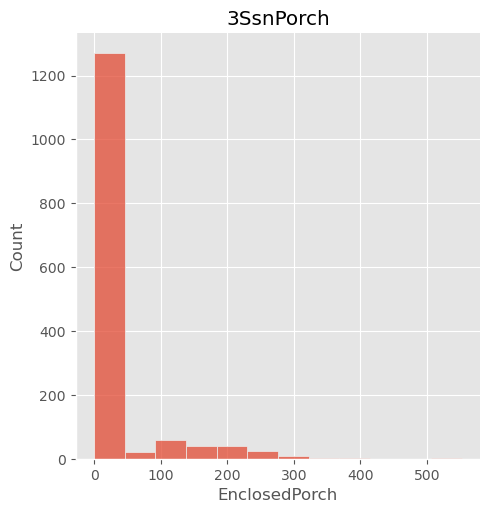

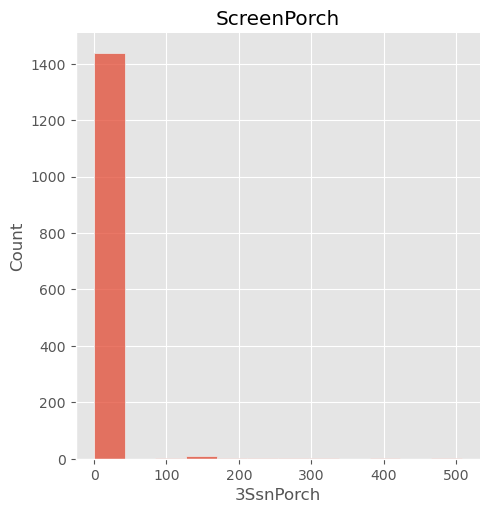

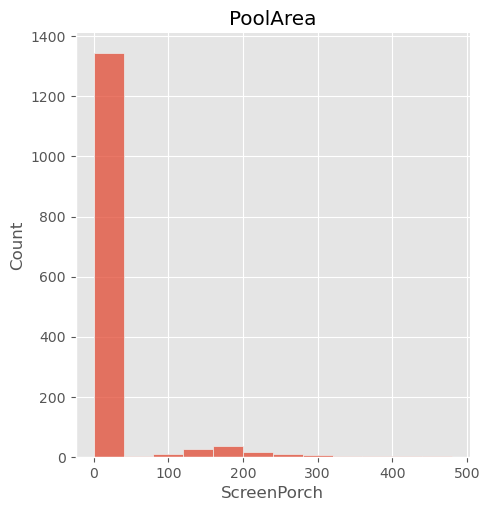

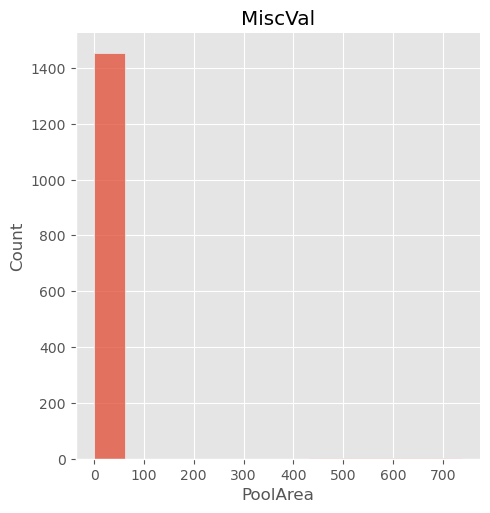

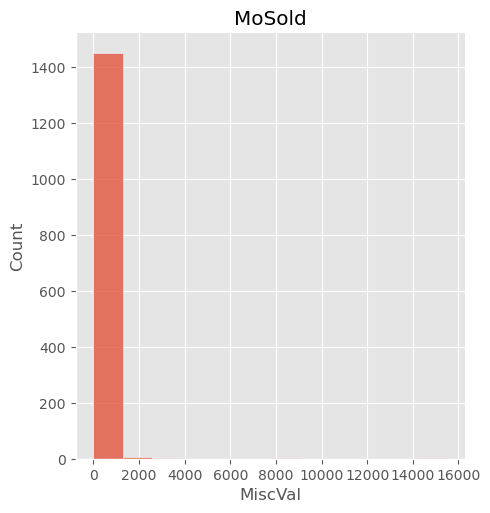

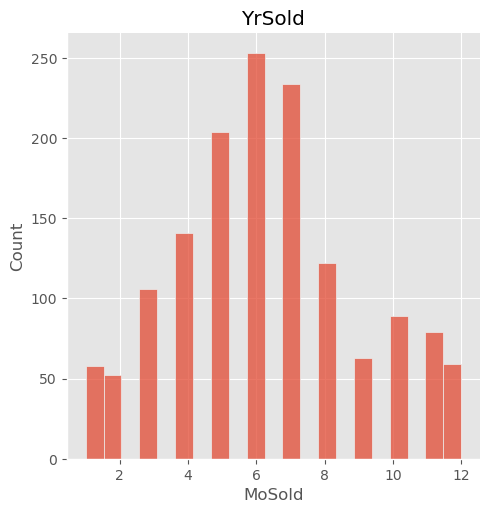

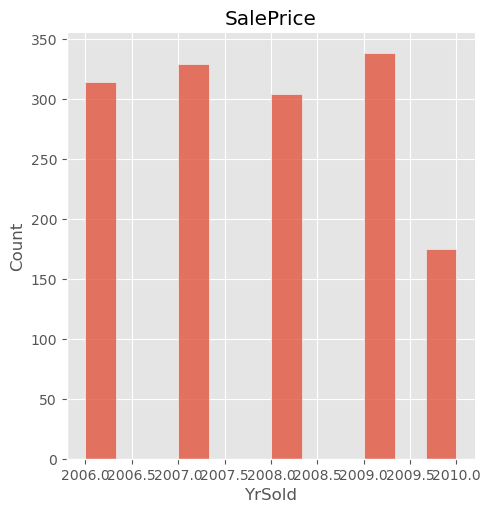

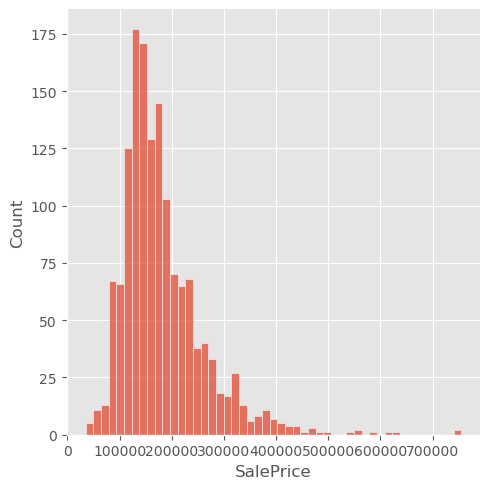

In [25]:
for i in df_num.columns:
    plt.title(i)
    sns.displot(df_num[i])
    plt.plot()

In [26]:
df_num.GrLivArea.value_counts()

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: GrLivArea, Length: 861, dtype: int64

In [27]:
df_num.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [28]:
df_num.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [29]:
# so there is no column in numerical datatype that contains a single value

In [30]:
# checking for the nulls
df_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [31]:
# we will replace the missing values with the median values

In [32]:
for i in df_num.columns:
    df_num[i] = df[i].fillna(df[i].median)

In [33]:
df_num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [34]:
# onehot encoding categorical columns 
# and deleting the id

In [35]:
df_num.drop(columns='Id', inplace= True)

In [36]:
df_num.isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [37]:
# encoding the categorical cols
df_cat = pd.get_dummies(df_cat, drop_first= True, dtype= int)

In [35]:
df_cat.dtypes.value_counts()

int32    209
dtype: int64

In [38]:
df_cat.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
df_num.select_dtypes(['object'])

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


In [40]:
# covering datatype to int
lis1 = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for i in lis1:
    df_num[i] = pd.to_numeric(df_num[i], errors= 'coerce')

In [41]:
# merging the data 
df = pd.concat([df_cat, df_num], axis= 1)

In [42]:
df

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,1,0,1,0,0,0,1,0,...,0,61,0,0,0,0,0,2,2008,208500
1,0,0,1,0,1,0,0,0,1,0,...,298,0,0,0,0,0,0,5,2007,181500
2,0,0,1,0,1,0,0,0,0,0,...,0,42,0,0,0,0,0,9,2008,223500
3,0,0,1,0,1,0,0,0,0,0,...,0,35,272,0,0,0,0,2,2006,140000
4,0,0,1,0,1,0,0,0,0,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,1,0,1,0,0,0,1,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,0,0,1,0,1,0,0,0,1,0,...,349,0,0,0,0,0,0,2,2010,210000
1457,0,0,1,0,1,0,0,0,1,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,0,0,1,0,1,0,0,0,1,0,...,366,0,112,0,0,0,0,4,2010,142125


In [43]:
df.dropna(inplace= True)

In [44]:
df.isnull().sum().sum()

0

In [45]:
print('Number of rows = ', df.shape[0],' and number of columns = ',df.shape[1])

Number of rows =  1121  and number of columns =  246


In [46]:
corr = df.corr()
corr

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning_FV,1.000000,-0.021343,-0.423177,-0.096758,0.013462,0.502508,-0.006987,-0.017833,0.056247,-0.045471,...,-0.048938,0.216839,-0.080227,-0.025315,-0.048415,-0.016422,-0.031812,0.001003,0.006341,0.090636
MSZoning_RH,-0.021343,1.000000,-0.178464,-0.040805,0.005677,0.036531,0.048412,-0.007521,0.020653,0.078535,...,0.012142,-0.052079,-0.007349,-0.010676,-0.026439,-0.006926,-0.013416,0.058624,0.000304,-0.064741
MSZoning_RL,-0.423177,-0.178464,1.000000,-0.809060,0.076472,-0.293813,0.024720,0.014819,-0.225655,0.018785,...,0.161361,-0.045741,-0.176607,0.048756,0.057997,0.038807,0.009781,-0.012858,0.015390,0.240090
MSZoning_RM,-0.096758,-0.040805,-0.809060,1.000000,-0.015480,0.005298,-0.033618,-0.002895,0.206285,-0.023653,...,-0.145566,-0.052728,0.235690,-0.035764,-0.029549,-0.031397,0.004745,-0.005926,-0.026246,-0.285428
Street_Pave,0.013462,0.005677,0.076472,-0.015480,1.000000,0.010900,-0.090172,0.004744,-0.006496,0.012095,...,0.032477,-0.022891,0.021341,0.006734,-0.051424,0.004368,-0.046978,0.007570,-0.042794,0.055601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PoolArea,-0.016422,-0.006926,0.038807,-0.031397,0.004368,-0.013297,-0.011249,0.129414,-0.027503,-0.014755,...,0.033076,0.033786,0.076342,-0.008215,0.067356,1.000000,0.128684,-0.054872,-0.053888,0.092488
MiscVal,-0.031812,-0.013416,0.009781,0.004745,-0.046978,-0.025758,-0.021790,-0.011209,0.030463,-0.017491,...,-0.007101,0.028843,0.028795,0.024614,0.169857,0.128684,1.000000,0.020067,0.034106,-0.036041
MoSold,0.001003,0.058624,-0.012858,-0.005926,0.007570,-0.043760,0.026831,0.002617,-0.057836,0.068471,...,0.041547,0.089767,-0.061083,0.022260,0.012859,-0.054872,0.020067,1.000000,-0.150577,0.051568
YrSold,0.006341,0.000304,0.015390,-0.026246,-0.042794,0.001343,0.041354,-0.030296,0.050138,-0.020694,...,0.014810,-0.053035,-0.001185,0.020731,-0.004118,-0.053888,0.034106,-0.150577,1.000000,-0.011869


In [47]:
corr['SalePrice']

MSZoning_FV    0.090636
MSZoning_RH   -0.064741
MSZoning_RL    0.240090
MSZoning_RM   -0.285428
Street_Pave    0.055601
                 ...   
PoolArea       0.092488
MiscVal       -0.036041
MoSold         0.051568
YrSold        -0.011869
SalePrice      1.000000
Name: SalePrice, Length: 246, dtype: float64

In [48]:
corr['SalePrice'].sort_values(ascending= False)[1:10]

OverallQual     0.797881
GrLivArea       0.705154
GarageCars      0.647034
GarageArea      0.619330
TotalBsmtSF     0.615612
1stFlrSF        0.607969
FullBath        0.566627
TotRmsAbvGrd    0.547067
YearBuilt       0.525394
Name: SalePrice, dtype: float64

In [49]:
# these columns are highly correlated to the dependant variable

In [50]:
# scaling the columns

In [51]:
X = df.drop(columns= 'SalePrice')

In [52]:
y = df['SalePrice']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
X_train.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
103,0,0,1,0,1,0,0,0,0,0,...,740,0,36,0,0,0,0,0,5,2010
1389,0,0,0,1,1,0,0,0,1,0,...,440,0,0,0,0,0,0,0,3,2007
686,1,0,0,0,1,0,0,0,1,0,...,578,144,105,0,0,0,0,0,8,2007
914,1,0,0,0,1,1,0,0,1,0,...,528,0,234,0,0,0,0,0,6,2009
818,0,0,1,0,1,0,0,0,1,0,...,440,0,0,0,0,0,0,0,6,2010


In [58]:
y_train.head

<bound method NDFrame.head of 103     198900
1389    131000
686     227875
914     173733
818     155000
         ...  
598     217500
162     220000
1364    144152
1426    271000
1114    117000
Name: SalePrice, Length: 751, dtype: int64>

In [61]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)

In [62]:
X_train_scaled

array([[-0.22109428, -0.07317617,  0.52444489, ..., -0.15399616,
        -0.48916671,  1.5933454 ],
       [-0.22109428, -0.07317617, -1.90677803, ..., -0.15399616,
        -1.22610593, -0.62944543],
       [ 4.52295731, -0.07317617, -1.90677803, ..., -0.15399616,
         0.61624211, -0.62944543],
       ...,
       [ 4.52295731, -0.07317617, -1.90677803, ..., -0.15399616,
        -0.85763632, -1.37037571],
       [-0.22109428, -0.07317617,  0.52444489, ..., -0.15399616,
         0.61624211,  0.11148485],
       [-0.22109428, -0.07317617,  0.52444489, ..., -0.15399616,
         0.61624211, -1.37037571]])

In [68]:
X_train_scaled = pd.DataFrame(X_train_scaled)

In [69]:
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,235,236,237,238,239,240,241,242,243,244
0,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,-1.553588,-0.203983,...,1.239839,-0.736470,-0.165142,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.489167,1.593345
1,-0.221094,-0.073176,-1.906778,2.304544,0.073176,-0.173719,-0.127429,-0.089742,0.643671,-0.203983,...,-0.303725,-0.736470,-0.706195,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-1.226106,-0.629445
2,4.522957,-0.073176,-1.906778,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,-0.203983,...,0.406314,0.408082,0.871877,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,0.616242,-0.629445
3,4.522957,-0.073176,-1.906778,-0.433925,0.073176,5.756419,-0.127429,-0.089742,0.643671,-0.203983,...,0.149054,-0.736470,2.810651,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.120697,0.852415
4,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,-0.203983,...,-0.303725,-0.736470,-0.706195,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.120697,1.593345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,-0.203983,...,0.627559,-0.736470,-0.706195,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-1.226106,-1.370376
747,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,-0.203983,...,0.169635,-0.736470,0.345853,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.489167,1.593345
748,4.522957,-0.073176,-1.906778,-0.433925,0.073176,5.756419,-0.127429,-0.089742,0.643671,-0.203983,...,-0.097917,-0.736470,1.788661,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.857636,-1.370376
749,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,-1.553588,-0.203983,...,0.133618,0.622686,1.277667,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,0.616242,0.111485


In [70]:
X_train_scaled.columns = X.columns

In [63]:
y_train

103     198900
1389    131000
686     227875
914     173733
818     155000
         ...  
598     217500
162     220000
1364    144152
1426    271000
1114    117000
Name: SalePrice, Length: 751, dtype: int64

In [71]:
X_scaled_with_cont = sm.add_constant(X_train_scaled)

In [72]:
X_scaled_with_cont

,const,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,-1.553588,...,1.239839,-0.736470,-0.165142,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.489167,1.593345
1,1.0,-0.221094,-0.073176,-1.906778,2.304544,0.073176,-0.173719,-0.127429,-0.089742,0.643671,...,-0.303725,-0.736470,-0.706195,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-1.226106,-0.629445
2,1.0,4.522957,-0.073176,-1.906778,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,...,0.406314,0.408082,0.871877,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,0.616242,-0.629445
3,1.0,4.522957,-0.073176,-1.906778,-0.433925,0.073176,5.756419,-0.127429,-0.089742,0.643671,...,0.149054,-0.736470,2.810651,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.120697,0.852415
4,1.0,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,...,-0.303725,-0.736470,-0.706195,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.120697,1.593345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,1.0,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,...,0.627559,-0.736470,-0.706195,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-1.226106,-1.370376
747,1.0,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,0.643671,...,0.169635,-0.736470,0.345853,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.489167,1.593345
748,1.0,4.522957,-0.073176,-1.906778,-0.433925,0.073176,5.756419,-0.127429,-0.089742,0.643671,...,-0.097917,-0.736470,1.788661,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,-0.857636,-1.370376
749,1.0,-0.221094,-0.073176,0.524445,-0.433925,0.073176,-0.173719,-0.127429,-0.089742,-1.553588,...,0.133618,0.622686,1.277667,-0.371545,-0.114068,-0.283395,-0.073078,-0.153996,0.616242,0.111485


In [74]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()

vif['Features'] = X_scaled_with_cont.columns
vif['VIF Factor'] = [ variance_inflation_factor(X_scaled_with_cont.values, i) for i in range(X_scaled_with_cont.shape[1]) ]

C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\pauld\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [75]:
vif

,Features,VIF Factor
0,const,1.000000
1,MSZoning_FV,30.607943
2,MSZoning_RH,5.444423
3,MSZoning_RL,99.698015
4,MSZoning_RM,69.850432
...,...,...
241,ScreenPorch,1.725260
242,PoolArea,2470.402688
243,MiscVal,2.218963
244,MoSold,1.393828


In [77]:
# choosing the features that has low variance
VIF = vif[vif['VIF Factor']<5]

In [85]:
l = vif[vif['VIF Factor']<5]['Features'].values
l

array(['const', 'Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNn', 'Condition2_RRNn', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'Exterior2nd_Other', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtCond_Gd', 'BsmtCond_TA',
       'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
       'BsmtFinType1_BLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType2_GLQ', 'Heatin

In [86]:
l = ['Alley_Pave', 'LotShape_IR2', 'LotShape_IR3',
       'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low',
       'LandContour_Lvl', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_ClearCr', 'Neighborhood_MeadowV',
       'Neighborhood_NPkVill', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_Feedr', 'Condition1_PosA',
       'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn',
       'Condition1_RRNn', 'Condition2_RRNn', 'HouseStyle_1.5Unf',
       'HouseStyle_2.5Unf', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'Exterior2nd_Other', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'BsmtQual_Fa', 'BsmtCond_Gd', 'BsmtCond_TA',
       'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No',
       'BsmtFinType1_BLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec',
       'BsmtFinType2_GLQ', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po',
       'HeatingQC_TA', 'CentralAir_Y', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_SBrkr', 'KitchenQual_Fa',
       'Functional_Maj2', 'Functional_Mod', 'FireplaceQu_Fa',
       'FireplaceQu_Po', 'GarageType_CarPort', 'GarageFinish_RFn',
       'PavedDrive_P', 'PavedDrive_Y', 'Fence_GdWo', 'Fence_MnPrv',
       'Fence_MnWw', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD',
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_Oth',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'LotFrontage', 'OverallCond', 'MasVnrArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'YrSold']

In [87]:
X_train = X_train[l]

In [88]:
X_test = X_test[l]

# Training Model

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
import xgboost as xgb

In [91]:
# Define pipelines
pipelines = {
    'linear': Pipeline([
        ('model', LinearRegression())
    ]),
    'knn': Pipeline([
        ('model', KNeighborsRegressor())
    ]),
    'random_forest': Pipeline([
        ('model', RandomForestRegressor())
    ]),
    'adaboost': Pipeline([
        ('model', AdaBoostRegressor())
    ]),
    'gradient_boosting': Pipeline([
        ('model', GradientBoostingRegressor())
    ]),
    'decision_tree': Pipeline([
        ('model', DecisionTreeRegressor())
    ]),
    'xgboost': Pipeline([
        ('model', xgb.XGBRegressor(objective='reg:squarederror'))
    ])
}


In [92]:
# using RMSE as loss function 
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [93]:
results = {}

for name, pipeline in pipelines.items():
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    rmse_value = rmse(y_test, y_pred)
    results[name] = {'RMSE': rmse_value}
    print(f'{name.capitalize()} RMSE: {rmse_value:.4f}')


Linear RMSE: 51008.3942
Knn RMSE: 70051.1003
Random_forest RMSE: 56341.6288
Adaboost RMSE: 63537.4242
Gradient_boosting RMSE: 51361.3224
Decision_tree RMSE: 75143.2051
Xgboost RMSE: 51933.4996


In [94]:
# Hyperparametric Tuning
param_grid = {
    'linear': {},
    'knn': {'model__n_neighbors': [3, 5, 7, 9]},
    'random_forest': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 10, 20]},
    'adaboost': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 1.0]},
    'gradient_boosting': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 5, 7]},
    'decision_tree': {'model__max_depth': [None, 10, 20, 30]},
    'xgboost': {'model__n_estimators': [50, 100, 200], 'model__learning_rate': [0.01, 0.1, 0.2], 'model__max_depth': [3, 5, 7]}
}

for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring=rmse_scorer)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    rmse_value = rmse(y_test, y_pred)
    
    results[name + '_grid_search'] = {'RMSE': rmse_value, 'Best Params': grid_search.best_params_}
    print(f'{name.capitalize()} (Grid Search) RMSE: {rmse_value:.4f}, Best Params: {grid_search.best_params_}')


Linear (Grid Search) RMSE: 51008.3942, Best Params: {}
Knn (Grid Search) RMSE: 68511.5572, Best Params: {'model__n_neighbors': 9}
Random_forest (Grid Search) RMSE: 57041.5751, Best Params: {'model__max_depth': 20, 'model__n_estimators': 100}
Adaboost (Grid Search) RMSE: 61652.6740, Best Params: {'model__learning_rate': 0.1, 'model__n_estimators': 200}
Gradient_boosting (Grid Search) RMSE: 50930.3288, Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 100}
Decision_tree (Grid Search) RMSE: 80343.6499, Best Params: {'model__max_depth': None}
Xgboost (Grid Search) RMSE: 52165.6771, Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__n_estimators': 100}


In [95]:
# best model is gradient boost